In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.lines as mlines

X = np.load('../../data/protein_expressions.npy')
Y=X[:,:2]
X=X[:,2:]
RS=np.random.RandomState(90)
perm=RS.permutation(307)

Y=Y[perm]
X=X[perm]


km = KMeans(n_clusters =2, init='k-means++')
km.fit(X)

print(km.labels_.shape)

X_scaled = PCA(n_components=2).fit(X).transform(X)

print(X_scaled.shape)

(307,)
(307, 2)


In [2]:
markers = [u'+', u'o']
colors = ['r', 'b', 'g', 'y']

<IPython.core.display.Javascript object>


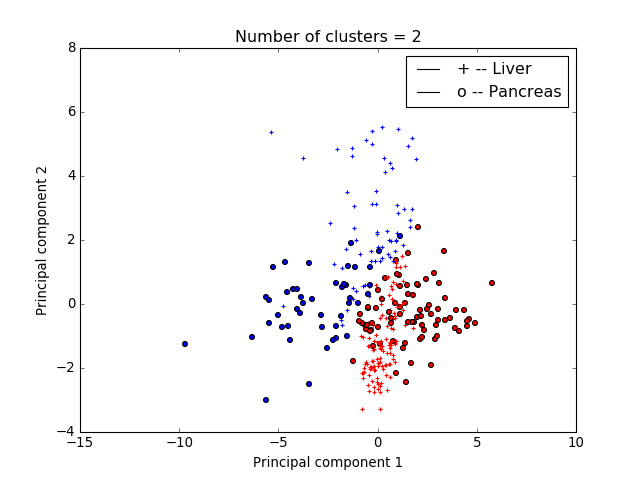

In [3]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.title("Number of clusters = 2")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")

liver = mlines.Line2D([], [], color='black', label='+ -- Liver  ')
pancreas = mlines.Line2D([], [], color='black', label='o -- Pancreas')

plt.legend(handles=[liver, pancreas])

for x, c, t in zip(X_scaled, km.labels_, Y[:,1]):
    ax1.scatter(x[0], x[1], marker=markers[int(t)], c=colors[int(c)])

<IPython.core.display.Javascript object>


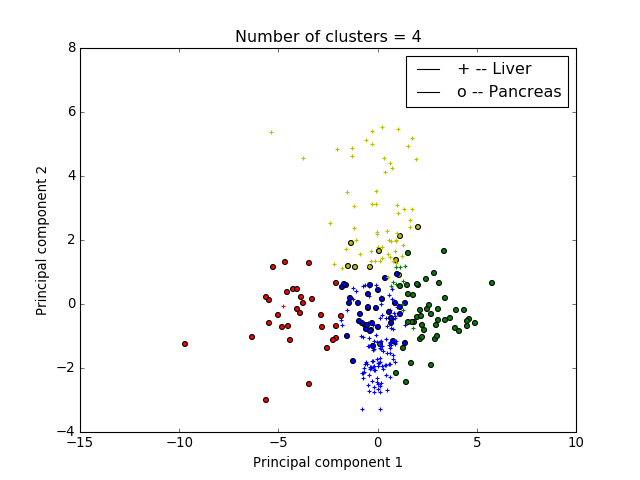

In [4]:
km = KMeans(n_clusters=4, init='k-means++')
km.fit(X)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.title("Number of clusters = 4")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")

plt.legend(handles=[liver, pancreas])

for x, c, t in zip(X_scaled, km.labels_, Y[:,1]):
    ax2.scatter(x[0], x[1], marker=markers[int(t)], c=colors[int(c)])